#Helix and Lipid Distribution

Calculate the tilt angle of a helix in a membrane and the distribution of lipids with respect to its principal axis.

<img src="files/untitled33.png">

<img src="files/untitled44.png">

##Import packages

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import MDAnalysis as mda
import MDAnalysis.analysis.helanal
import geometry
import lipidsCenters

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##Load the trajectories

In [2]:
#tpr_file = 'ruyin_helix/system2_minim.tpr'
#gro_file = 'ruyin_helix/system2_minim.gro'
#u = mda.Universe(tpr_file,gro_file)
gro_file = 'Band3_traj/band3.gro'
xtc_file = 'Band3_traj/band3.xtc'
u = mda.Universe(gro_file,xtc_file)

##Calculate tilt angles and distances

In [6]:
rlist = []
philist = []

for ts in u.trajectory:
    
    # Select the C_alpha atoms in the trajectory (assumes there is only one helix)
    calpha = u.select_atoms('name CA')
    
    # Calculate the principal axis 
    princ = calpha.principal_axes()

    # Calculate the tilt angle and append it to the list
    philist.append(geometry.tilt(calpha))
    
    # Center of mass of the helix
    com_calpha = calpha.center_of_mass()
    
    # COM of lipids
    com_lipids, com_heads, com_tails = lipidsCenters.membrane_mass_centers(u,'POPC','C2')
    
    # Distance of the COM to the principal axis
    for point in com_tails:
        r = geometry.dist_point_line(point,com_calpha,princ[0])
        rlist.append(r)


##Show the distributions

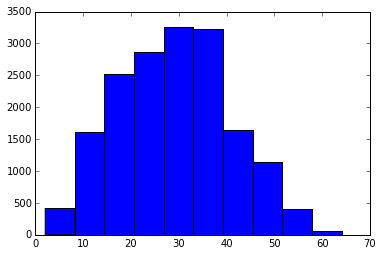

In [7]:
plt.hist(rlist)
plt.show()

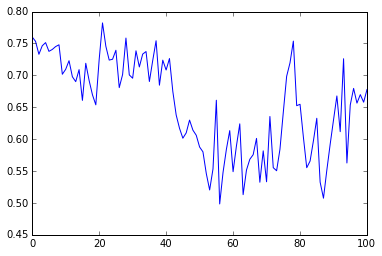

In [8]:
plt.plot(philist)
plt.show()

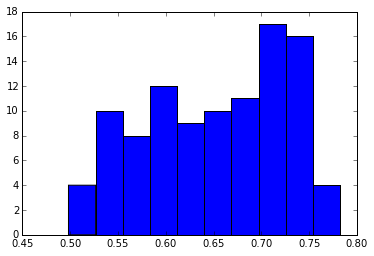

In [5]:
plt.hist(philist)
plt.show()